In [93]:
import numpy as np 
import re
from sklearn.feature_extraction import text
from difflib import SequenceMatcher
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt



In [95]:
df_train = pd.read_csv('C:/Users/Genesis/Pictures/digintetn/textAnalysisData/1/train.csv', encoding="ISO-8859-1")
df_test = pd.read_csv('C:/Users/Genesis/Pictures/digintetn/textAnalysisData/1/test.csv', encoding="ISO-8859-1")

df_train = df_train.rename(columns = {'Unnamed: 0':'train_id'})
print(df_train.columns)

Index(['train_id', 'description_x', 'description_y', 'ticker_x', 'ticker_y',
       'same_security'],
      dtype='object')


In [101]:

vectorizer = text.TfidfVectorizer()


def seq_match(test1, test2):
    #print(SequenceMatcher(None, test1, test2).ratio())
    return SequenceMatcher(None, test1, test2).ratio()
    


def cosine_sim(test1, test2):
    tfidf = vectorizer.fit_transform([test1, test2])
    result = ((tfidf * tfidf.T).A)[0,1]
    return result
   
def cosine_sim_df(df_data):
   
    col1 = 'description_x'
    col2 = 'description_y'    
    
    df_data['cos_sim'] = 0
    df_data['cos_sim'] = df_data.apply(lambda x: cosine_sim(x[col1], x[col2]), axis=1)
    df_data['seq_match'] = 0
    df_data['seq_match'] = df_data.apply(lambda x: seq_match(x[col1], x[col2]), axis=1)
    return df_data


df_result = cosine_sim_df(df_train)

    


df_result.head()

,train_id,description_x,description_y,ticker_x,ticker_y,same_security,cos_sim,seq_match
0,0,first trust dow jones internet,first trust dj internet idx,FDN,FDN,True,0.431613,0.807018
1,1,schwab intl large company index etf,schwab strategic tr fundamental intl large co ...,FNDF,FNDF,True,0.527072,0.666667
2,2,vanguard small cap index adm,vanguard small-cap index fund inst,VSMAX,VSCIX,False,0.580333,0.806452
3,3,duke energy corp new com new isin #us4 sedol #...,duke energy corp new com new isin #us26441c204...,DUK,DUK,True,0.716812,0.902655
4,4,visa inc class a,visa inc.,V,V,True,0.709297,0.640000


In [102]:

#df_result.head()


In [97]:
s=[]


for i in df_result["cos_sim"]:
    s.append(i)

In [ ]:

    for i in df_train['description_x']:
    print(i)
    print(i.replace(r'\d',''))
    print((i==i.replace(r'\d','')))

In [103]:
#"abd    sknks   21231 sakndks  dskamd".replace(r'\d','')

In [ ]:

dfsales = df.groupby(by='Description').agg({'UnitPrice':"count"})

dfsales["Sum"]=df.groupby(by='Description')['UnitPrice'].sum()

dfsales.columns=["UnitpriceCount","UnitPriceSum"]
dfsales.head()

In [ ]:
import itertools
ba=[]
print(len(df),len(df["Description"].unique()))
df=df.dropna(subset =["Description"])
print(len(df))
for i in df["Description"].unique():
    
    f = list(filter(lambda word: word not in stopwords.words('english'), i.split()))
    ba.append(f)

In [104]:

import pandas as pd
df=pd.read_csv("C:/Users/Genesis/Pictures/digintetn/all_scaled.csv")
#need to convert thids to datetime format so that it can be compared,I had done study on the sleeping 
#patern of people using date,it needs to be convereted otherwise we wont be able to compare the date 




In [112]:
import pandas as pd
df=pd.read_csv("C:/Users/Genesis/Pictures/digintetn/all_scaled.csv")
x=df.columns
df_scaled=df[x[1:4]]
clust_labels=df["class"]
x

Index(['Unnamed: 0', 'NoOfDays', 'TotalOrders', 'TotalnoOfItems', 'class'], dtype='object')

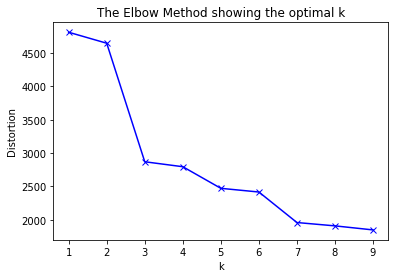

[4810.2521132299116, 4645.7291943901819, 2869.9765562233811, 2795.7491691383566, 2472.0389169823216, 2416.7313406133594, 1959.6155455144535, 1909.640144103528, 1849.0563644458935]


In [113]:
  
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
X=df_scaled
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    #print(k,kmeanModel)
    
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) )
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

In [ ]:
print(len(df))
import numpy as np
q75, q25 = np.percentile(df[x[1:4]].TotalnoOfItems.dropna(), [75 ,25])
iqr = q75 - q25

min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
print(len(df))
q75, q25 = np.percentile(df.TotalnoOfItems.dropna(), [75 ,25])
iqr = q75 - q25
 
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
print(len(df))


from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
X=df[x[1:4]]
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    #print(k,kmeanModel)
    
    distortions.append(sum(np.min(cdist(df[1:4], kmeanModel.cluster_centers_, 'euclidean'), axis=1)) )
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

In [117]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.cluster import KMeans

from sklearn import preprocessing
from sklearn import metrics

for i in range(2,6):
    clust_model = KMeans(n_clusters=i,
                     init='k-means++')
    clust_labels = clust_model.fit_predict(df_scaled)
    silhouette_avg = metrics.silhouette_score(df_scaled,clust_labels)
    print(silhouette_avg ,i)
    

0.915250099002 2
0.53815391983 3
0.539000274129 4
0.55316988222 5


In [3]:
sns.violinplot(df["TotalOrders"],df['TotalnoOfItems']) #Variable Plot

sns.despine()

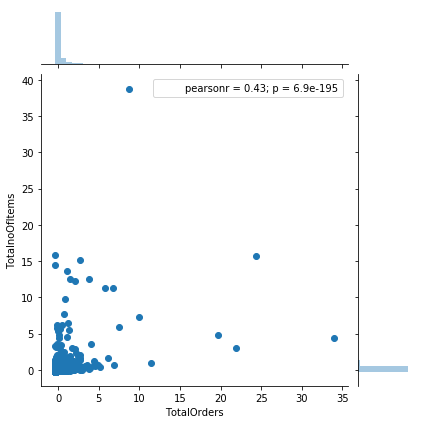

In [124]:
sns.jointplot(x="TotalOrders", y="TotalnoOfItems", data=df)
plt.show()

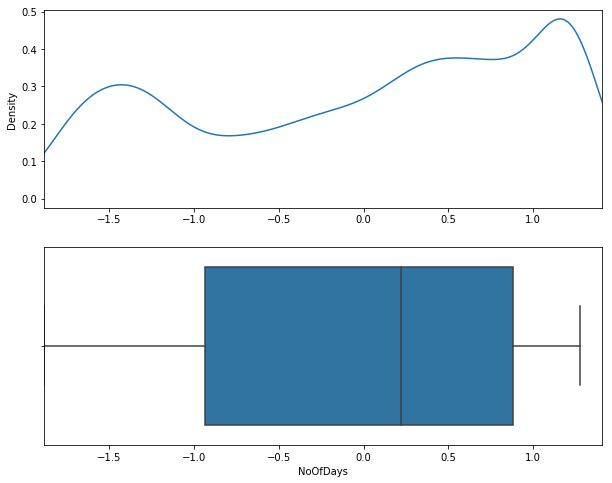

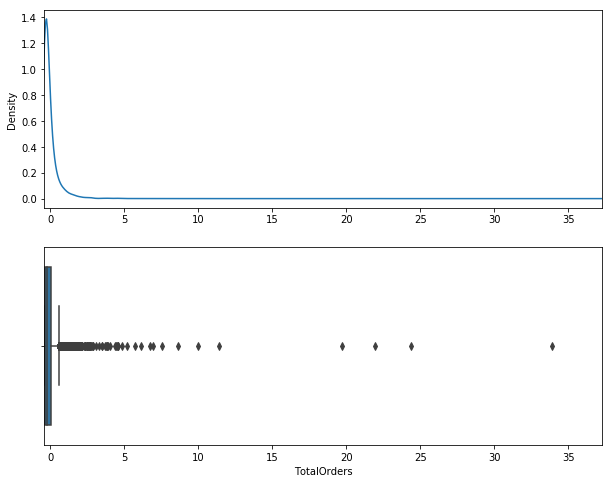

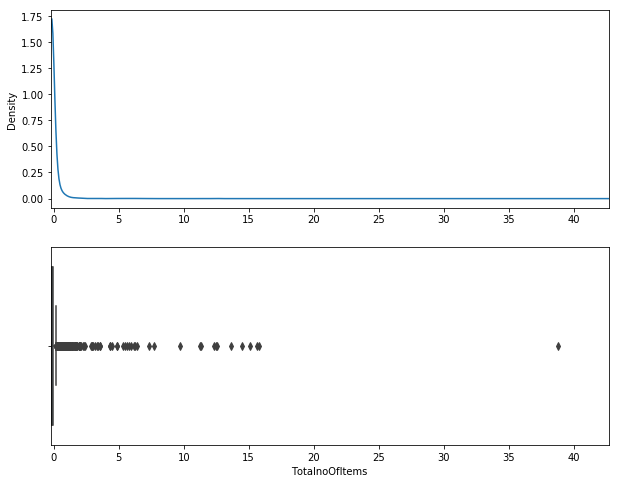

In [123]:
for i in x[1:4]:
    
    plt.figure(figsize=(10,8))
    plt.subplot(211)
    
    plt.xlim(df[i].min(), df[i].max()*1.1)
    ax = df[i].plot(kind='kde')

    plt.subplot(212)
    plt.xlim(df[i].min(), df[i].max()*1.1)
    sns.boxplot(x=df[i])
    
plt.show()

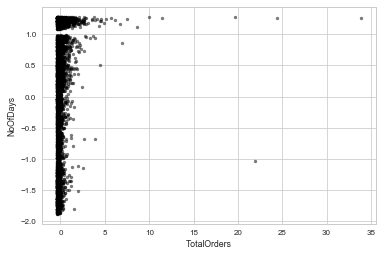

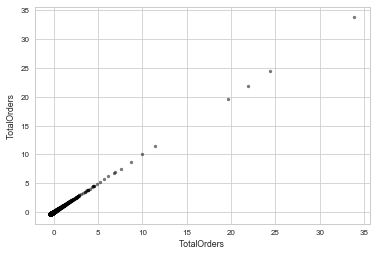

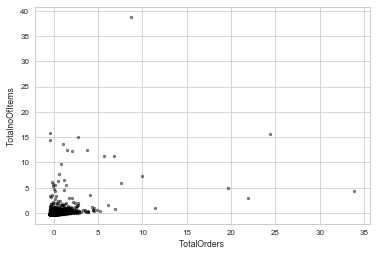

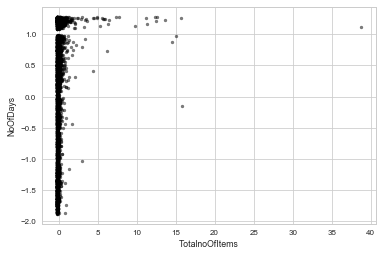

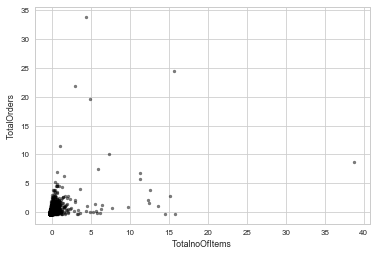

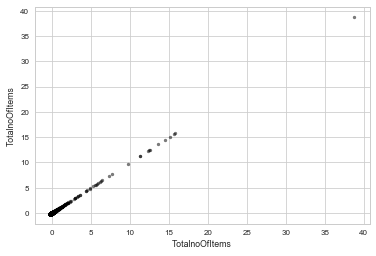

In [48]:
x=df.columns
colors = (0,0,0)
area = np.pi*3
 
for i in x[2:4]:
    for j in x[1:4]:
        plt.scatter(df[i], df[j], s=area, c=colors, alpha=0.5)

        plt.xlabel(i)
        plt.ylabel(j)
        plt.show()

In [53]:
for i in x[1:4]:
    
    plt.figure(figsize=(10,8))
    plt.subplot(211)
    
    plt.xlim(df[i].min(), df[i].max()*1.1)

    ax = df[i].plot(kind='kde')

    plt.subplot(212)
    plt.xlim(df[i].min(), df[i].max()*1.1)
    sns.boxplot(x=df[i])

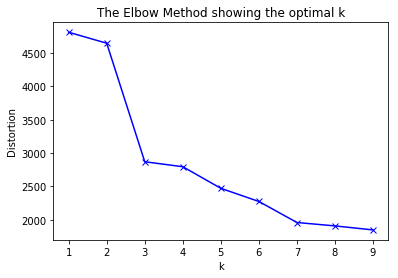

[4810.2521132299116, 4645.7291943901819, 2870.1868904747803, 2795.7079165919954, 2472.0389169823216, 2275.105735023641, 1960.0102133830824, 1909.0525009245807, 1849.0488759615114]


In [50]:
  
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
X=df_scaled

clust_labels=df["class"]
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    #print(k,kmeanModel)
    
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) )
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

In [49]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.cluster import KMeans


from sklearn import preprocessing
from sklearn import metrics
clust_labels=df["class"]
df_scaled=df[feat[1:4]]
for i in range(2,8):
    clust_model = KMeans(n_clusters=i,
                     init='k-means++')
    clust_labels = clust_model.fit_predict(df_scaled)
    silhouette_avg = metrics.silhouette_score(df_scaled,clust_labels)
    print(silhouette_avg ,i)

0.915250099002 2
0.53815391983 3
0.539000274129 4
0.554742852511 5
0.546335317908 6
0.46877864455 7


In [47]:
df_scaled.head()

,NoOfDays,TotalOrders,TotalnoOfItems
0,0.871208,-0.396578,14.473038
1,1.219040,0.394649,0.251058
2,1.142687,-0.265435,0.227869
3,-1.733293,-0.081836,-0.111047
4,0.735469,-0.326635,-0.197065


In [ ]:
print(len(df))
df_cleaned_TotalnoOfItems=df[df.TotalnoOfItems<20]
len(df_cleaned_TotalnoOfItems)

distortions = []
X=df_cleaned_TotalnoOfItems[feat[1:4]]
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    #print(k,kmeanModel)
    
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) )
    # Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

4338


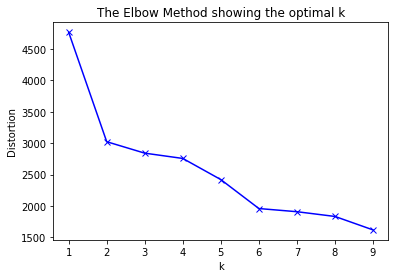

[4764.8550416015814, 3022.9139388383869, 2840.7767356622489, 2756.6354526032392, 2419.9280146317842, 1959.5857019436214, 1909.1223443743336, 1833.5926857898435, 1619.3686654767187]


In [88]:
print(len(df))
df_cleaned_TotalnoOfItems=df[df.TotalnoOfItems<20]
len(df_cleaned_TotalnoOfItems)

distortions = []
X=df_cleaned_TotalnoOfItems[feat[1:4]]
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    #print(k,kmeanModel)
    
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) )
    # Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

In [43]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.cluster import KMeans


from sklearn import preprocessing
from sklearn import metrics
clust_labels=df_cleaned_TotalnoOfItems["class"]
df_scaled=df_cleaned_TotalnoOfItems[feat[1:4]]
for i in range(2,8):
    clust_model = KMeans(n_clusters=i,
                     init='k-means++')
    clust_labels = clust_model.fit_predict(df_scaled)
    silhouette_avg = metrics.silhouette_score(df_scaled,clust_labels)
    print(silhouette_avg ,i)

0.519224549953 2
0.539046570174 3
0.554404786263 4
0.54656380306 5
0.468207418225 6
0.471874961951 7


4338
4334


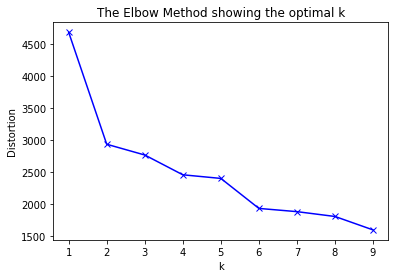

[4688.4312489480772, 2935.1648398389098, 2766.6754697459046, 2456.8046527800361, 2400.0887683818096, 1930.5120025511717, 1879.9701016334704, 1804.372413239045, 1593.9432378446193]


In [21]:
print(len(df))
df_cleaned_TotalOrders=df[df.TotalOrders<15]
print(len(df_cleaned_TotalOrders))

distortions = []
X=df_cleaned_TotalOrders[feat[1:4]]
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    #print(k,kmeanModel)
    
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) )
    # Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

In [42]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.cluster import KMeans


from sklearn import preprocessing
from sklearn import metrics
clust_labels=df_cleaned_TotalOrders["class"]
df_scaled=df_cleaned_TotalOrders[feat[1:4]]
for i in range(2,8):
    clust_model = KMeans(n_clusters=i,
                     init='k-means++')
    clust_labels = clust_model.fit_predict(df_scaled)
    silhouette_avg = metrics.silhouette_score(df_scaled,clust_labels)
    print(silhouette_avg ,i)

0.520382890625 2
0.540172257205 3
0.552065630145 4
0.537668864142 5
0.469479040193 6
0.473213739712 7


4338
4332


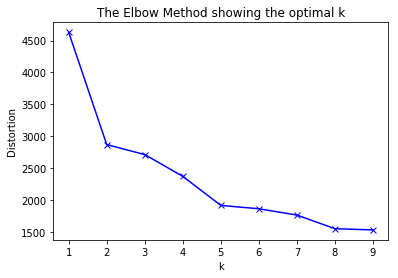

[4630.4695750688625, 2870.5869167670412, 2713.7505150205475, 2372.1217541363762, 1917.5432214675091, 1864.7669117318587, 1765.9561384119741, 1552.4880013269405, 1533.507537986171]


In [28]:
print(len(df))
df_cleaned_both=df[(df.TotalOrders<10) & (df.TotalnoOfItems<20)]
print(len(df_cleaned_both))

distortions = []
X=df_cleaned_both[feat[1:4]]
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    #print(k,kmeanModel)
    
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) )
    # Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

In [37]:
df_cleaned_both.columns

Index(['Unnamed: 0', 'NoOfDays', 'TotalOrders', 'TotalnoOfItems', 'class'], dtype='object')

In [41]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.cluster import KMeans


from sklearn import preprocessing
from sklearn import metrics
clust_labels=df_cleaned_both["class"]
df_scaled=df_cleaned_both[feat[1:4]]
for i in range(2,8):
    clust_model = KMeans(n_clusters=i,
                     init='k-means++')
    clust_labels = clust_model.fit_predict(df_scaled)
    silhouette_avg = metrics.silhouette_score(df_scaled,clust_labels)
    print(silhouette_avg ,i)
    

0.524322733373 2
0.544038065497 3
0.539275487587 4
0.469809000951 5
0.473335173127 6
0.473867147831 7


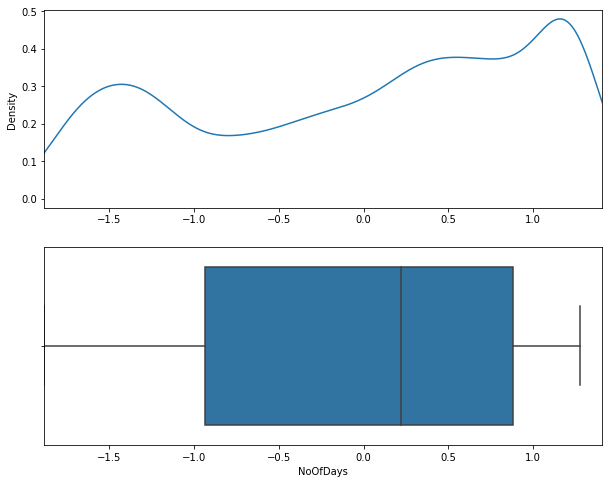

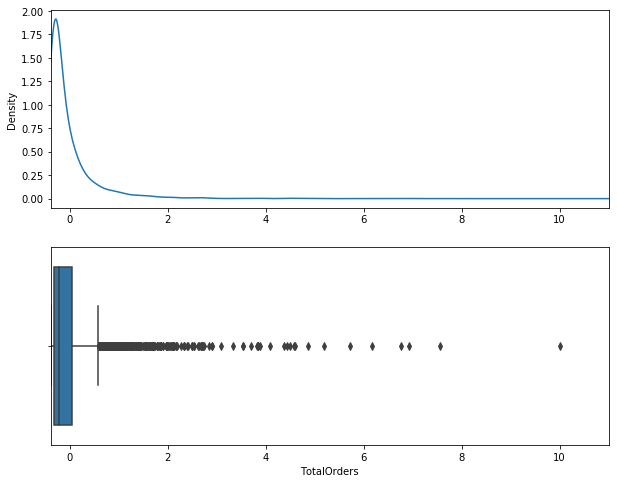

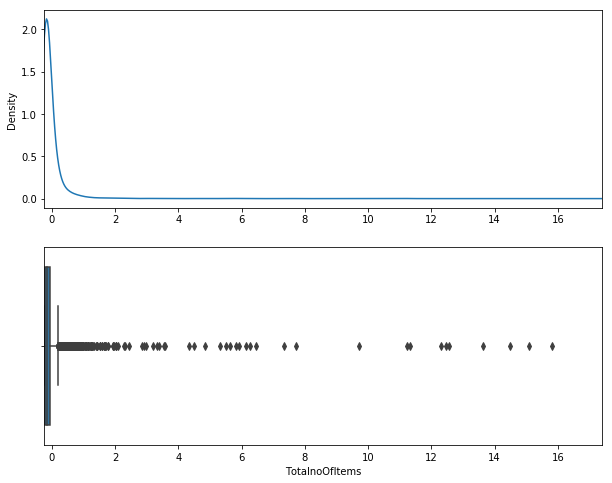

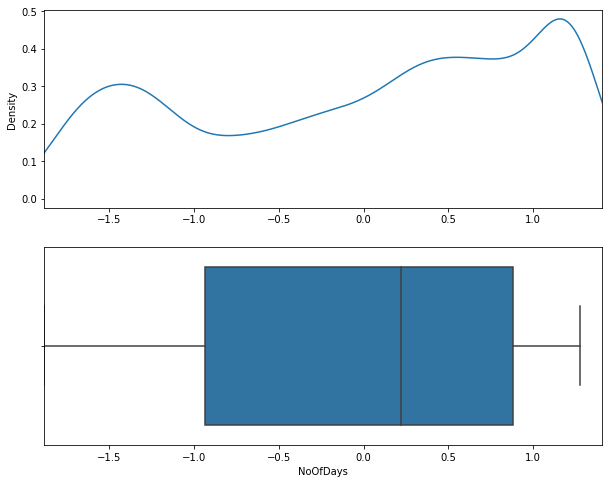

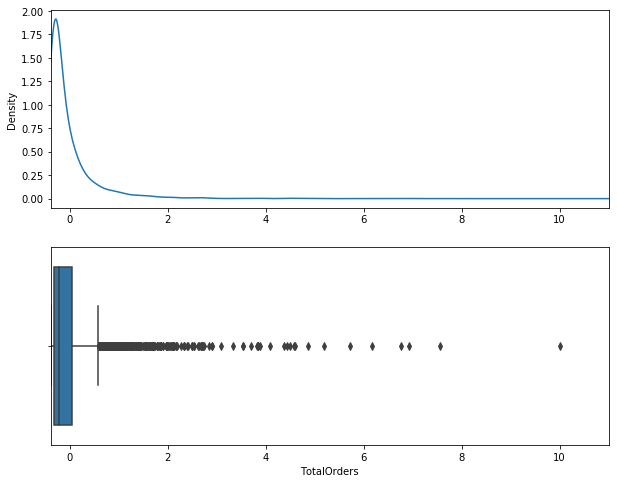

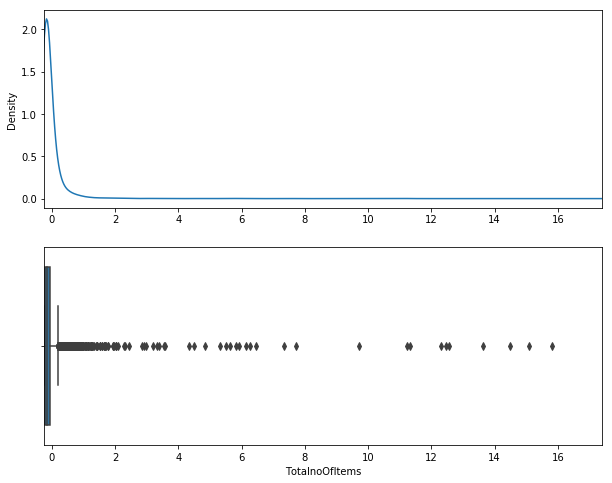

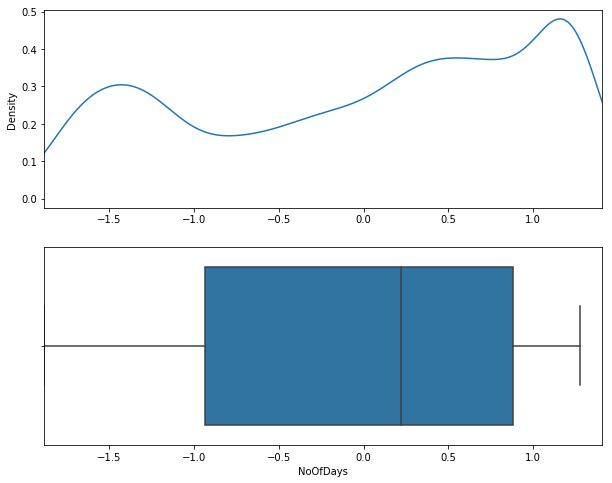

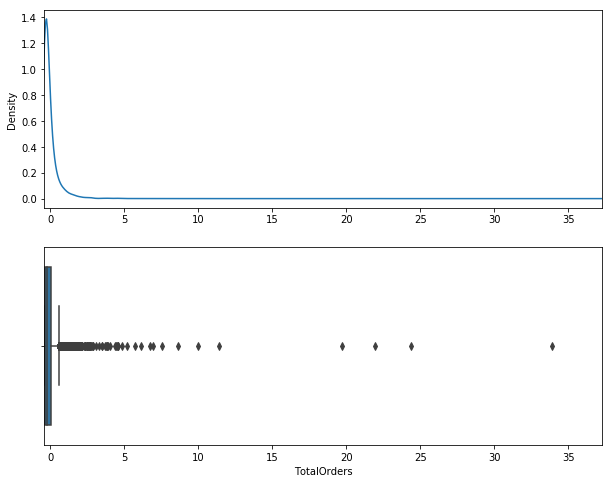

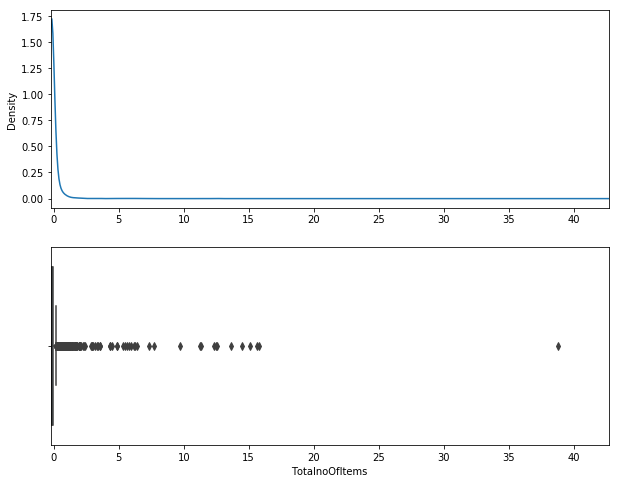

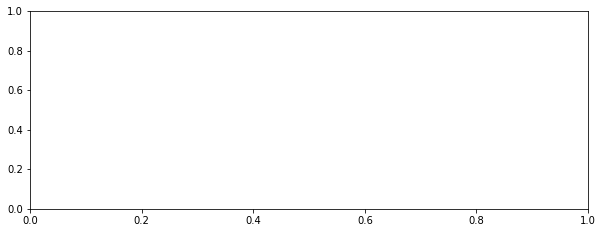

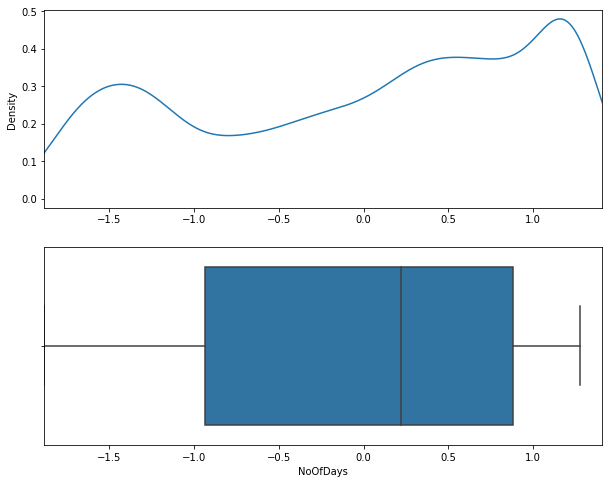

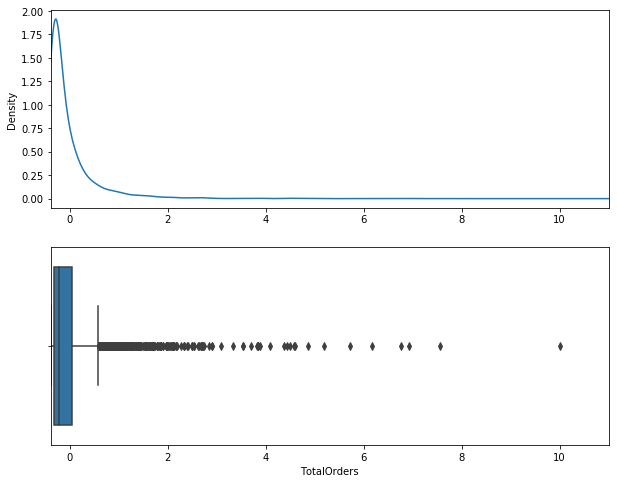

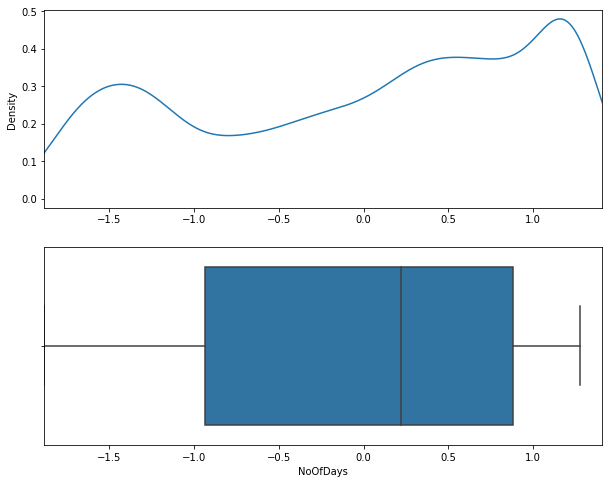

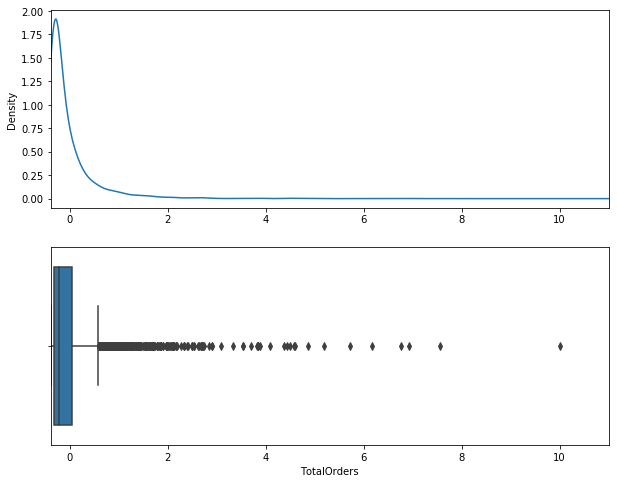

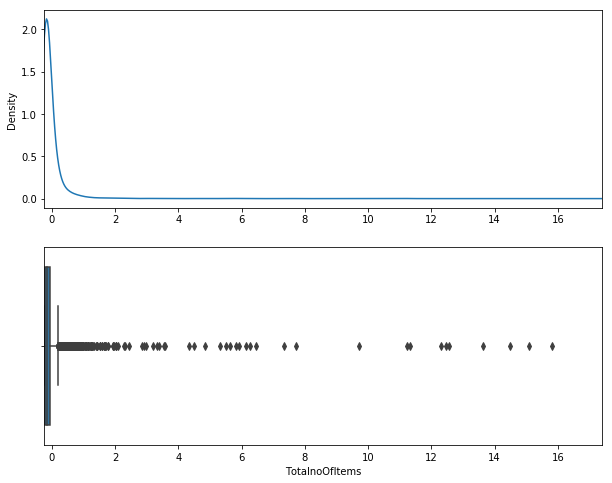

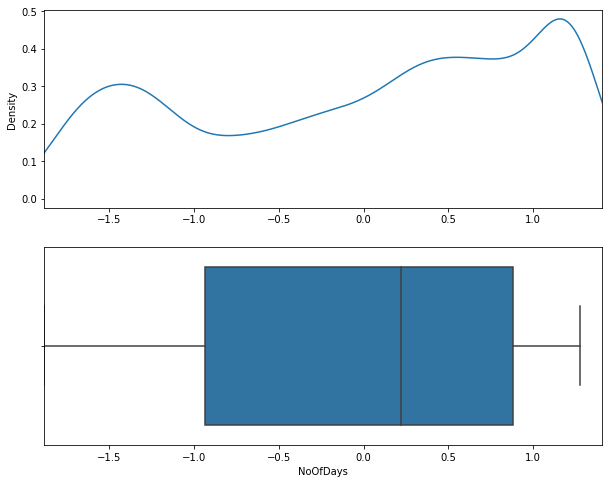

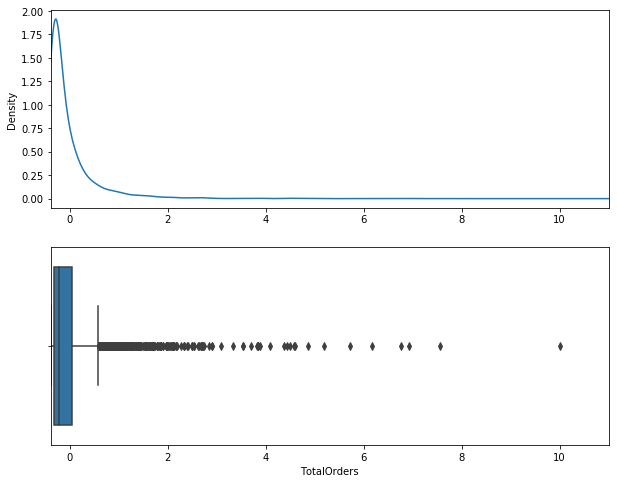

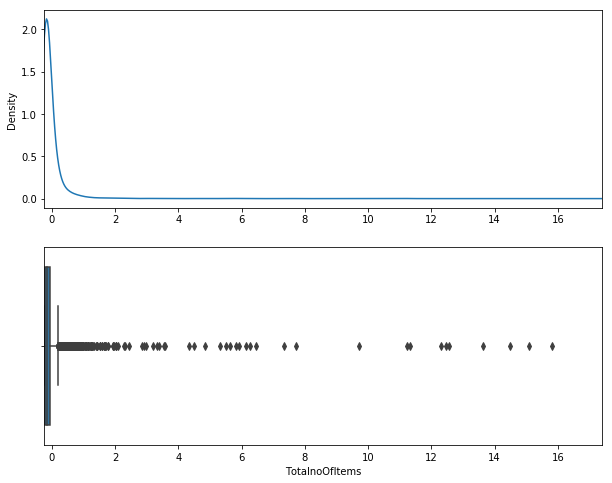

In [60]:
for i in feat[1:4]:
    
    plt.figure(figsize=(10,8))
    plt.subplot(211)
    
    plt.xlim(df_cleaned_both[i].min(), df_cleaned_both[i].max()*1.1)

    ax = df_cleaned_both[i].plot(kind='kde')

    plt.subplot(212)
    plt.xlim(df_cleaned_both[i].min(), df_cleaned_both[i].max()*1.1)
    sns.boxplot(x=df_cleaned_both[i])
plt.show()

In [56]:
df.columns

Index(['Unnamed: 0', 'NoOfDays', 'TotalOrders', 'TotalnoOfItems', 'class'], dtype='object')

4338
4310


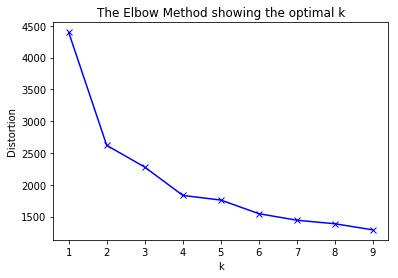

[4399.3674050238078, 2619.9304839338238, 2278.2825944946599, 1832.6699777590341, 1759.5068217853084, 1545.1883897367666, 1442.2963681159672, 1386.7114038772206, 1289.9640377158028]


In [67]:
print(len(df))
df_cleaned_both=df[(df.TotalOrders<4) & (df.TotalnoOfItems<8)]
print(len(df_cleaned_both))


distortions = []
X=df_cleaned_both[feat[1:4]]
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    #print(k,kmeanModel)
    
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) )
    # Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

In [70]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.cluster import KMeans


from sklearn import preprocessing
from sklearn import metrics
clust_labels=df_cleaned_both["class"]
df_scaled=df_cleaned_both[feat[1:4]]
for i in range(2,8):
    clust_model = KMeans(n_clusters=i,
                     init='k-means++')
    clust_labels = clust_model.fit_predict(df_scaled)
    silhouette_avg = metrics.silhouette_score(df_scaled,clust_labels)
    print(silhouette_avg ,i)
plt.show()    

0.545156367067 2
0.527637755455 3
0.469301774603 4
0.47653716805 5
0.430241991376 6
0.433053870034 7


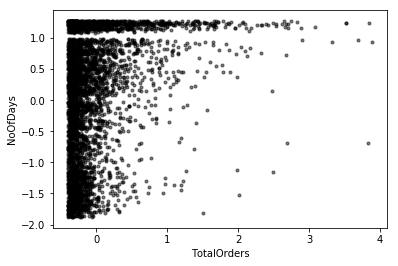

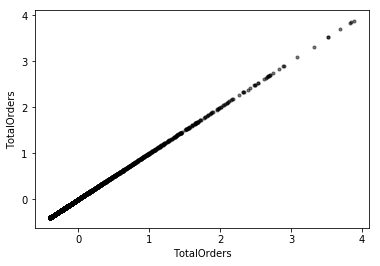

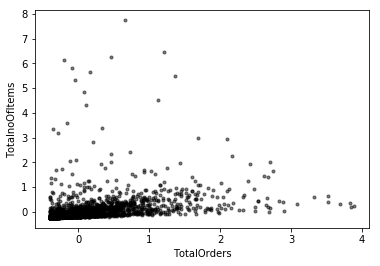

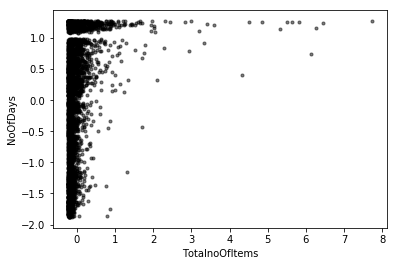

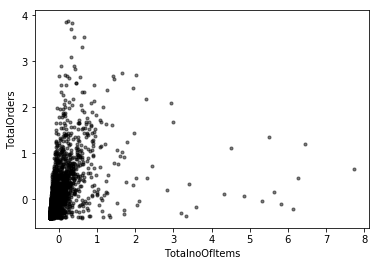

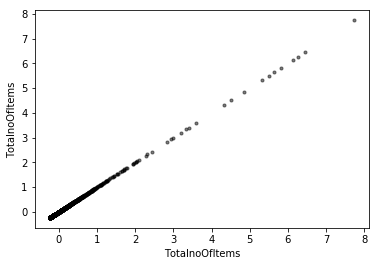

In [65]:
x=df_cleaned_both.columns
colors = (0,0,0)
area = np.pi*3
 
for i in x[2:4]:
    for j in x[1:4]:
        plt.scatter(df_cleaned_both[i], df_cleaned_both[j], s=area, c=colors, alpha=0.5)

        plt.xlabel(i)
        plt.ylabel(j)
        plt.show()

4338
4287


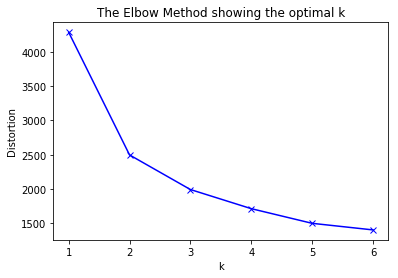

[4282.9987171267703, 2496.2172911827106, 1992.191266053482, 1713.5546502107291, 1500.0406460147678, 1404.132622592145]


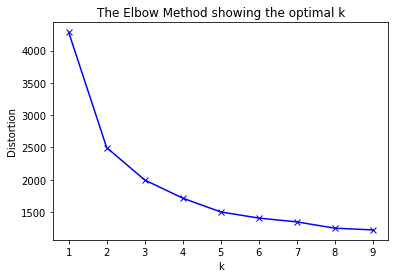

[4282.9987171267703, 2495.8927882364637, 1995.0980566318301, 1713.5546502107291, 1500.0444563858182, 1405.384834632521, 1346.2559444552626, 1248.8218826898246, 1222.1466418125226]


In [87]:
print(len(df))
df_cleaned_both=df[(df.TotalOrders<3) & (df.TotalnoOfItems<3)]
print(len(df_cleaned_both))

distortions = []
X=df_cleaned_both[feat[1:4]]
K = range(1,7)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    #print(k,kmeanModel)
    
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) )
    # Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)


distortions = []
X=df_cleaned_both[feat[1:4]]
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    #print(k,kmeanModel)
    
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) )
    # Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

In [78]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.cluster import KMeans


from sklearn import preprocessing
from sklearn import metrics
clust_labels=df_cleaned_both["class"]
df_scaled=df_cleaned_both[feat[1:4]]
for i in range(2,8):
    clust_model = KMeans(n_clusters=i,
                     init='k-means++')
    clust_labels = clust_model.fit_predict(df_scaled)
    silhouette_avg = metrics.silhouette_score(df_scaled,clust_labels)
    print(silhouette_avg ,i)
plt.show()  

0.646766751817 2
0.576088677015 3
0.542833743075 4
0.486066750889 5
0.459183196456 6
0.453526758315 7


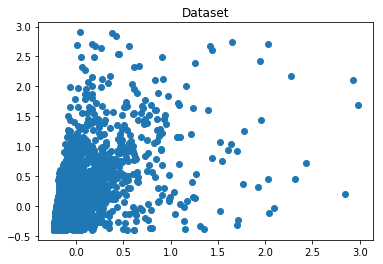

[]

In [92]:
plt.plot()
plt.title('Dataset')
plt.scatter(df_cleaned_both["TotalnoOfItems"], df_cleaned_both["TotalOrders"])
plt.show()
 
# create new plot and data
plt.plot()

In [89]:
df_cleaned_both.columns

Index(['Unnamed: 0', 'NoOfDays', 'TotalOrders', 'TotalnoOfItems', 'class'], dtype='object')

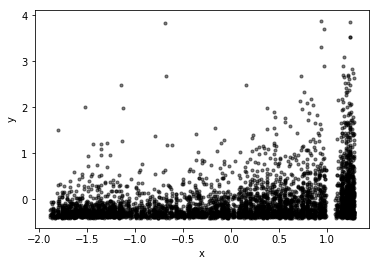

In [86]:

# Plot
colors = (0,0,0)
area = np.pi*3
 
plt.scatter(df_cleaned_both['NoOfDays'], df_cleaned_both["TotalOrders"], s=area, c=colors, alpha=0.5)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [57]:
i = 'TotalOrders'
 
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(df_cleaned_both[i].min(), df_cleaned_both[i].max()*1.1)
 
ax = df_cleaned_both[i].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(df_cleaned_both[i].min(), df_cleaned_both[i].max()*1.1)
sns.boxplot(x=df_cleaned_both[i])

In [55]:
for i in feat[1:2]:
    
    plt.figure(figsize=(10,8))
    plt.subplot(211)
    
    plt.xlim(df_cleaned_both[i].min(), df_cleaned_both[i].max()*1.1)

    ax = df_cleaned_both[i].plot(kind='kde')

    plt.subplot(212)
    plt.xlim(df_cleaned_both[i].min(), df_cleaned_both[i].max()*1.1)
    sns.boxplot(x=df_cleaned_both[i])

In [31]:
df["NoOfDays"].describe()



count    4.338000e+03
mean    -1.637950e-18
std      1.000115e+00
min     -1.886000e+00
25%     -9.358234e-01
50%      2.179619e-01
75%      8.796917e-01
max      1.278426e+00
Name: NoOfDays, dtype: float64

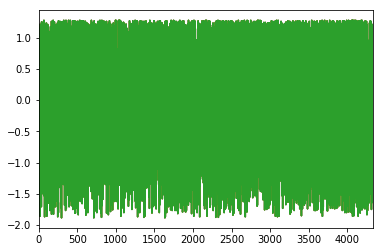

In [35]:

from matplotlib import pyplot
df["NoOfDays"].plot()

pyplot.show()

In [ ]:
    i=df["NoOfDays"] 
    plt.figure(figsize=(10,8))
    plt.subplot(211)
    
    plt.xlim(df[i].min(), df[i].max()*1.1)

    ax = df[i].plot(kind='kde')

    plt.subplot(212)
    plt.xlim(df[i].min(), df[i].max()*1.1)
    sns.boxplot(x=df[i])

In [16]:
feat=df.columns
feat[1:4]

Index(['NoOfDays', 'TotalOrders', 'TotalnoOfItems'], dtype='object')

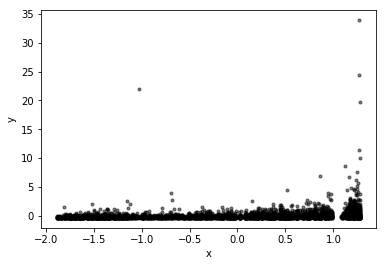

In [36]:

# Plot
colors = (0,0,0)
area = np.pi*3
 
plt.scatter(df['NoOfDays'], df["TotalOrders"], s=area, c=colors, alpha=0.5)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

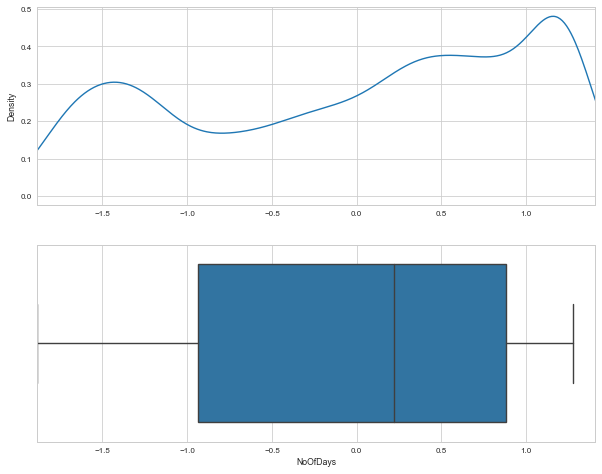

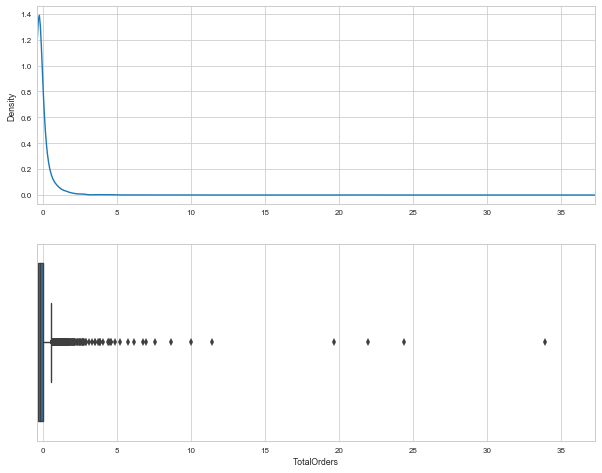

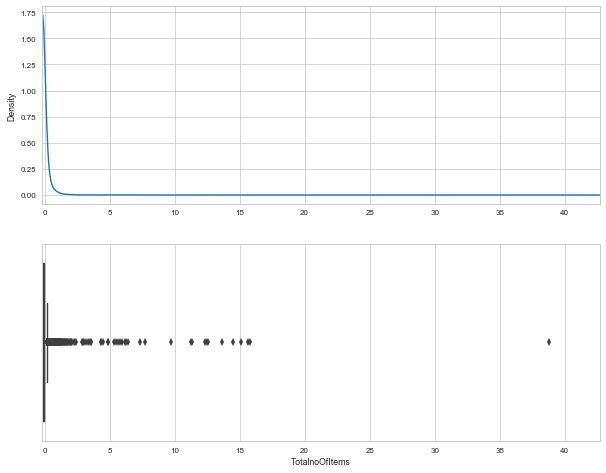

In [46]:
for i in x[1:4]:
    
    plt.figure(figsize=(10,8))
    plt.subplot(211)
    
    plt.xlim(df[i].min(), df[i].max()*1.1)
    ax = df[i].plot(kind='kde')

    plt.subplot(212)
    plt.xlim(df[i].min(), df[i].max()*1.1)
    sns.boxplot(x=df[i])

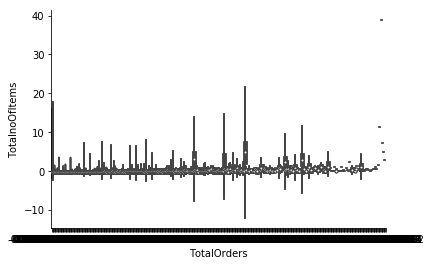

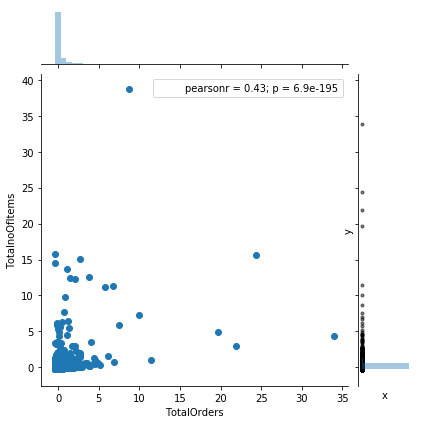

In [5]:
import numpy as np
import matplotlib.pyplot as plt
 

colors = (0,0,0)
area = np.pi*3
 
# Plot
plt.scatter(df['TotalnoOfItems'], df["TotalOrders"], s=area, c=colors, alpha=0.5)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

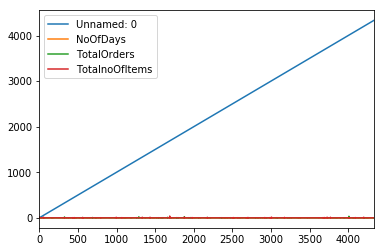

In [23]:
df.plot()

from matplotlib import pyplot
pyplot.show()

In [28]:
x=df.drop("Unnamed: 0",axis=1)
x=x.drop("class",axis=1)


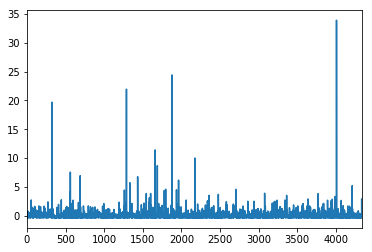

In [31]:
x["TotalOrders"].plot()

from matplotlib import pyplot
pyplot.show()

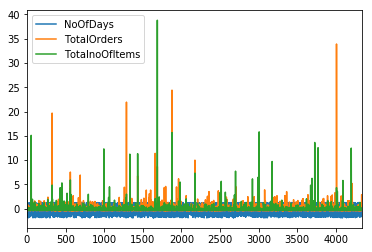

In [32]:
x.plot()

from matplotlib import pyplot
pyplot.show()

In [41]:


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

MAX_ROWS = 10
pd.set_option('display.max_rows', MAX_ROWS)
pd.set_option('display.max_columns', 200)

sns.set_style("whitegrid")
sns.set_context("paper")

import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt
 
%matplotlib inline
 
import seaborn as sns
 
MAX_ROWS = 10
pd.set_option('display.max_rows', MAX_ROWS)
pd.set_option('display.max_columns', 200)
 
sns.set_style("whitegrid")
sns.set_context("paper")